In [1]:
import pandas as pd
import numpy as np

In [2]:
df_A = pd.read_csv('ddinter_downloads_code_A.csv')
df_B = pd.read_csv('ddinter_downloads_code_B.csv')
df_D = pd.read_csv('ddinter_downloads_code_D.csv')
df_H = pd.read_csv('ddinter_downloads_code_H.csv')
df_L = pd.read_csv('ddinter_downloads_code_L.csv')
df_P = pd.read_csv('ddinter_downloads_code_P.csv')
df_R = pd.read_csv('ddinter_downloads_code_R.csv')
df_V = pd.read_csv('ddinter_downloads_code_V.csv')

In [10]:
frames = [df_A, df_B, df_D, df_H, df_L, df_P, df_R, df_V]

In [49]:
df_ddi = pd.concat(frames)

In [50]:
df_ddi.head(10)

,DDInterID_A,Drug_A,DDInterID_B,Drug_B,Level
0,DDInter1263,Naltrexone,DDInter1,Abacavir,Moderate
1,DDInter1,Abacavir,DDInter1348,Orlistat,Moderate
2,DDInter58,Aluminum hydroxide,DDInter582,Dolutegravir,Major
3,DDInter112,Aprepitant,DDInter582,Dolutegravir,Minor
4,DDInter138,Attapulgite,DDInter582,Dolutegravir,Major
5,DDInter270,Calcium acetate,DDInter582,Dolutegravir,Major
6,DDInter271,Calcium carbonate,DDInter582,Dolutegravir,Major
7,DDInter582,Dolutegravir,DDInter273,Calcium citrate,Major
8,DDInter582,Dolutegravir,DDInter274,Calcium glubionate anhydrous,Major
9,DDInter582,Dolutegravir,DDInter276,Calcium gluconate,Major


In [52]:
df_ddi.shape

(222383, 5)

In [53]:
df_ddi.reset_index(inplace=True)

In [54]:
df_ddi.drop('index',inplace=True,axis=1)

In [19]:
df_ddi['Drug_A'].value_counts()

Prednisolone               2092
Triamcinolone              2001
Hydrocortisone             1858
Betamethasone              1554
Dexamethasone              1433
                           ... 
Pegvaliase                    1
Sodium glycerophosphate       1
Octasulfur (topical)          1
Methacholine                  1
Spectinomycin                 1
Name: Drug_A, Length: 1770, dtype: int64

In [20]:
df_ddi['Drug_B'].value_counts()

Dexamethasone     2426
Prednisolone      1802
Promethazine      1697
Budesonide        1339
Hydrocortisone    1179
                  ... 
Norelgestromin       1
Ethiodized oil       1
Anidulafungin        1
Glatiramer           1
Miglustat            1
Name: Drug_B, Length: 1858, dtype: int64

In [22]:
len(df_ddi['Drug_B'].unique())

1858

In [23]:
len(df_ddi['Drug_A'].unique())

1770

In [24]:
UDA = df_ddi['Drug_B'].unique()

In [25]:
UDB = df_ddi['Drug_A'].unique()

In [27]:
UDA = np.append(UDA,UDB)

In [28]:
UDA =list(set(UDA))

In [31]:
len(UDA)

1939

In [64]:
df_ddi.head()

,Drug_A,Drug_B,Level,weights
0,Naltrexone,Abacavir,Moderate,2
1,Abacavir,Orlistat,Moderate,2
2,Aluminum hydroxide,Dolutegravir,Major,3
3,Aprepitant,Dolutegravir,Minor,1
4,Attapulgite,Dolutegravir,Major,3


In [55]:
df_ddi.drop('DDInterID_A',axis=1,inplace=True)
df_ddi.drop('DDInterID_B',axis=1,inplace=True)

In [60]:
df_ddi.dtypes

Drug_A       object
Drug_B       object
Level      category
weights        int8
dtype: object

In [47]:
df_ddi['Drug_A'] = df_ddi['Drug_A'].astype('|S') 
df_ddi['Drug_B'] = df_ddi['Drug_B'].astype('|S') 
df_ddi['Level'] = df_ddi['Level'].astype('|S') 

In [57]:
df_ddi['Level'] = df_ddi['Level'].astype('category') 

In [58]:
df_ddi['weights'] = ''

In [59]:
df_ddi['weights'] = df_ddi['Level'].cat.codes

In [65]:
df_ddi[df_ddi['Level'] == 'Unknown']

,Drug_A,Drug_B,Level,weights
41600,Goserelin,Simvastatin,Unknown,0
41601,Goserelin,Misoprostol,Unknown,0
41602,Goserelin,Rosuvastatin,Unknown,0
41603,Desmopressin,Lactulose,Unknown,0
41604,Desmopressin,Simvastatin,Unknown,0
...,...,...,...,...
222378,Dexamethasone,Galactose,Unknown,0
222379,Sodium bicarbonate,Galactose,Unknown,0
222380,Cefepime,Galactose,Unknown,0
222381,Ursodeoxycholic acid,Galactose,Unknown,0


In [63]:
new_label = {"weights": {3: 0, 2: 2, 1: 1, 0: 3}}
df_ddi.replace(new_label , inplace = True)

In [70]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [68]:
G = nx.from_pandas_edgelist(df_ddi, source='Drug_A', target='Drug_B', edge_attr='weights')

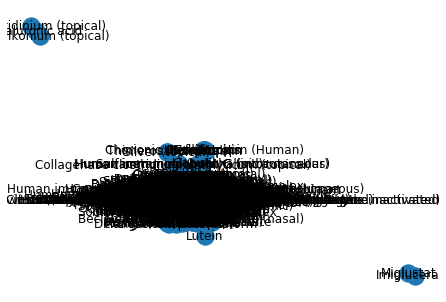

In [74]:
nx.draw(G, with_labels=True, width=5, edge_color="skyblue", style="solid")

In [90]:
G['Dolutegravir']

KeysView(AtlasView({'Aluminum hydroxide': {'weights': 3}, 'Aprepitant': {'weights': 1}, 'Attapulgite': {'weights': 3}, 'Calcium acetate': {'weights': 3}, 'Calcium carbonate': {'weights': 3}, 'Calcium citrate': {'weights': 3}, 'Calcium glubionate anhydrous': {'weights': 3}, 'Calcium gluconate': {'weights': 3}, 'Calcium lactate': {'weights': 3}, 'Calcium Phosphate': {'weights': 3}, 'Iron': {'weights': 3}, 'Cimetidine': {'weights': 1}, 'Clarithromycin': {'weights': 1}, 'Clotrimazole': {'weights': 1}, 'Dexamethasone': {'weights': 1}, 'Kaolin': {'weights': 3}, 'Magaldrate': {'weights': 3}, 'Magnesium carbonate': {'weights': 3}, 'Magnesium chloride': {'weights': 3}, 'Magnesium citrate': {'weights': 3}, 'Magnesium gluconate': {'weights': 3}, 'Magnesium hydroxide': {'weights': 3}, 'Magnesium oxide': {'weights': 3}, 'Magnesium sulfate': {'weights': 3}, 'Metformin': {'weights': 2}, 'Miconazole': {'weights': 1}, 'Sucralfate': {'weights': 3}, 'Troglitazone': {'weights': 1}, 'Orlistat': {'weights':

In [101]:
for source, target in G.edges():
    if source == 'Dolutegravir':
        print(G[source][target])

{'weights': 1}
{'weights': 3}
{'weights': 3}
{'weights': 3}
{'weights': 3}
{'weights': 3}
{'weights': 3}
{'weights': 3}
{'weights': 3}
{'weights': 3}
{'weights': 1}
{'weights': 1}
{'weights': 1}
{'weights': 1}
{'weights': 3}
{'weights': 3}
{'weights': 3}
{'weights': 3}
{'weights': 3}
{'weights': 3}
{'weights': 3}
{'weights': 3}
{'weights': 3}
{'weights': 2}
{'weights': 1}
{'weights': 3}
{'weights': 1}
{'weights': 3}
{'weights': 3}
{'weights': 3}
{'weights': 3}
{'weights': 3}
{'weights': 1}
{'weights': 1}
{'weights': 1}
{'weights': 1}
{'weights': 1}
{'weights': 1}
{'weights': 1}
{'weights': 1}
{'weights': 1}
{'weights': 1}
{'weights': 3}
{'weights': 1}
{'weights': 1}
{'weights': 1}
{'weights': 1}
{'weights': 1}
{'weights': 1}
{'weights': 1}
{'weights': 1}
{'weights': 1}
{'weights': 1}
{'weights': 1}
{'weights': 1}
{'weights': 2}
{'weights': 1}
{'weights': 1}
{'weights': 3}
{'weights': 1}


In [106]:
nx.get_node_attributes(G, 'Dolutegravir')

{}

In [112]:
G['Dolutegravir']

AtlasView({'Aluminum hydroxide': {'weights': 3}, 'Aprepitant': {'weights': 1}, 'Attapulgite': {'weights': 3}, 'Calcium acetate': {'weights': 3}, 'Calcium carbonate': {'weights': 3}, 'Calcium citrate': {'weights': 3}, 'Calcium glubionate anhydrous': {'weights': 3}, 'Calcium gluconate': {'weights': 3}, 'Calcium lactate': {'weights': 3}, 'Calcium Phosphate': {'weights': 3}, 'Iron': {'weights': 3}, 'Cimetidine': {'weights': 1}, 'Clarithromycin': {'weights': 1}, 'Clotrimazole': {'weights': 1}, 'Dexamethasone': {'weights': 1}, 'Kaolin': {'weights': 3}, 'Magaldrate': {'weights': 3}, 'Magnesium carbonate': {'weights': 3}, 'Magnesium chloride': {'weights': 3}, 'Magnesium citrate': {'weights': 3}, 'Magnesium gluconate': {'weights': 3}, 'Magnesium hydroxide': {'weights': 3}, 'Magnesium oxide': {'weights': 3}, 'Magnesium sulfate': {'weights': 3}, 'Metformin': {'weights': 2}, 'Miconazole': {'weights': 1}, 'Sucralfate': {'weights': 3}, 'Troglitazone': {'weights': 1}, 'Orlistat': {'weights': 2}, 'Zin

In [122]:
G['Dolutegravir'].keys()[0]

TypeError: 'KeysView' object does not support indexing

In [128]:
for i in UDA:
    try:
        print(i + ' '+ str(G['Dolutegravir'][i]['weights']))        
    except KeyError:
         print(i + ' ' + 'Uknown')

Axitinib Uknown
Tromethamine Uknown
Bisoprolol Uknown
Levocarnitine Uknown
Nicardipine Uknown
Acamprosate Uknown
Proguanil Uknown
Cranberry Uknown
Triethylenetetramine Uknown
Racepinephrine Uknown
Isradipine Uknown
Conjugated estrogens (topical) Uknown
Nelfinavir Uknown
Corticotropin Uknown
Plazomicin Uknown
Chlorothiazide Uknown
Olmesartan Uknown
Fentanyl Uknown
Atropine (ophthalmic) Uknown
Methohexital Uknown
Interferon alfa-n1 Uknown
Flurbiprofen (ophthalmic) Uknown
Epoprostenol Uknown
Nicotine Uknown
Meropenem Uknown
Cefoxitin Uknown
Tropicamide (ophthalmic) Uknown
Roflumilast Uknown
Sonidegib Uknown
Migalastat Uknown
Phenindamine Uknown
Pemoline Uknown
Isoetharine Uknown
Ginkgo biloba Uknown
Amphotericin B (cholesteryl sulfate) Uknown
Chloroquine Uknown
Pegaptanib (ophthalmic) Uknown
Ivabradine Uknown
Iopromide Uknown
Inebilizumab Uknown
Fosinopril Uknown
Ulobetasol (topical) Uknown
Azithromycin Uknown
Chlorambucil Uknown
Isoflurophate (ophthalmic) Uknown
Sitagliptin Uknown
Benzyl

In [129]:
for i in UDA:
    try:
        print(i + ' '+ str(G['Griseofulvin'][i]['weights']))        
    except KeyError:
         print(i + ' ' + 'Uknown')

Axitinib 2
Tromethamine Uknown
Bisoprolol Uknown
Levocarnitine Uknown
Nicardipine Uknown
Acamprosate Uknown
Proguanil Uknown
Cranberry Uknown
Triethylenetetramine Uknown
Racepinephrine Uknown
Isradipine Uknown
Conjugated estrogens (topical) Uknown
Nelfinavir 2
Corticotropin Uknown
Plazomicin Uknown
Chlorothiazide Uknown
Olmesartan Uknown
Fentanyl 2
Atropine (ophthalmic) Uknown
Methohexital 2
Interferon alfa-n1 Uknown
Flurbiprofen (ophthalmic) Uknown
Epoprostenol Uknown
Nicotine Uknown
Meropenem Uknown
Cefoxitin Uknown
Tropicamide (ophthalmic) Uknown
Roflumilast Uknown
Sonidegib 2
Migalastat Uknown
Phenindamine Uknown
Pemoline Uknown
Isoetharine Uknown
Ginkgo biloba Uknown
Amphotericin B (cholesteryl sulfate) Uknown
Chloroquine Uknown
Pegaptanib (ophthalmic) Uknown
Ivabradine 2
Iopromide Uknown
Inebilizumab Uknown
Fosinopril Uknown
Ulobetasol (topical) Uknown
Azithromycin Uknown
Chlorambucil Uknown
Isoflurophate (ophthalmic) Uknown
Sitagliptin Uknown
Benzylpenicillin Uknown
Baclofen Ukn

In [132]:
from pyvis.network import Network

KeyboardInterrupt: 

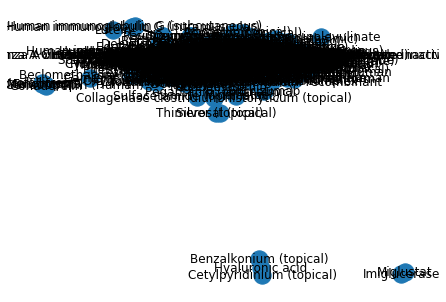

In [136]:
nx.draw(G, with_labels = True)
nt = Network('500px', '500px')
nt.from_nx(G)
nt.show('nx.html')